# Analysis of Happiness data for 5 years from 2015 to 2019

In [0]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data for 2015, 2016 and 2017

In [0]:
df_15 = pd.read_csv(r"C:\Users\sharm\Downloads\2015.csv")
df_16 = pd.read_csv(r"C:\Users\sharm\Downloads\2016.csv")
df_17 = pd.read_csv(r"C:\Users\sharm\Downloads\2017.csv")



In [0]:
#columns name change
df_15.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_15.columns]
df_16.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_16.columns]
df_17.columns=[each.replace("."," ") for each in df_17.columns]
df_17.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_17.columns]

## Happiness Data Analysis for year 2015

### Data cleaning

In [0]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country              158 non-null object
Region               158 non-null object
Happiness_Rank       158 non-null int64
Happiness_Score      158 non-null float64
Standard_Error       158 non-null float64
Economy              158 non-null float64
Family               158 non-null float64
Health               158 non-null float64
Freedom              158 non-null float64
Trust                158 non-null float64
Generosity           158 non-null float64
Dystopia_Residual    158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [0]:
print("Are There Missing Data? :",df_15.isnull().any().any())
print(df_15.isnull().sum())

Are There Missing Data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


#### Correlation between the different attributes of year 2015

In [0]:
df_15.corr()


,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Happiness_Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness_Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


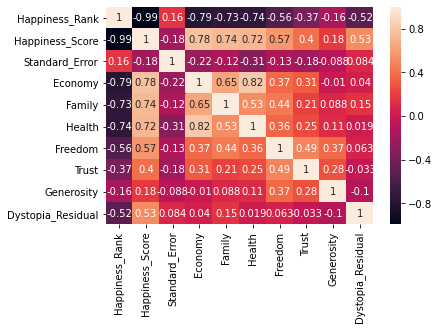

In [0]:
corrMatrix = df_15.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

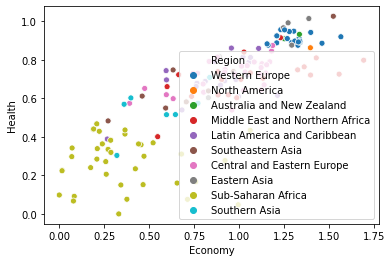

In [0]:
sns.scatterplot(x="Economy", y="Health", hue = 'Region', data=df_15)

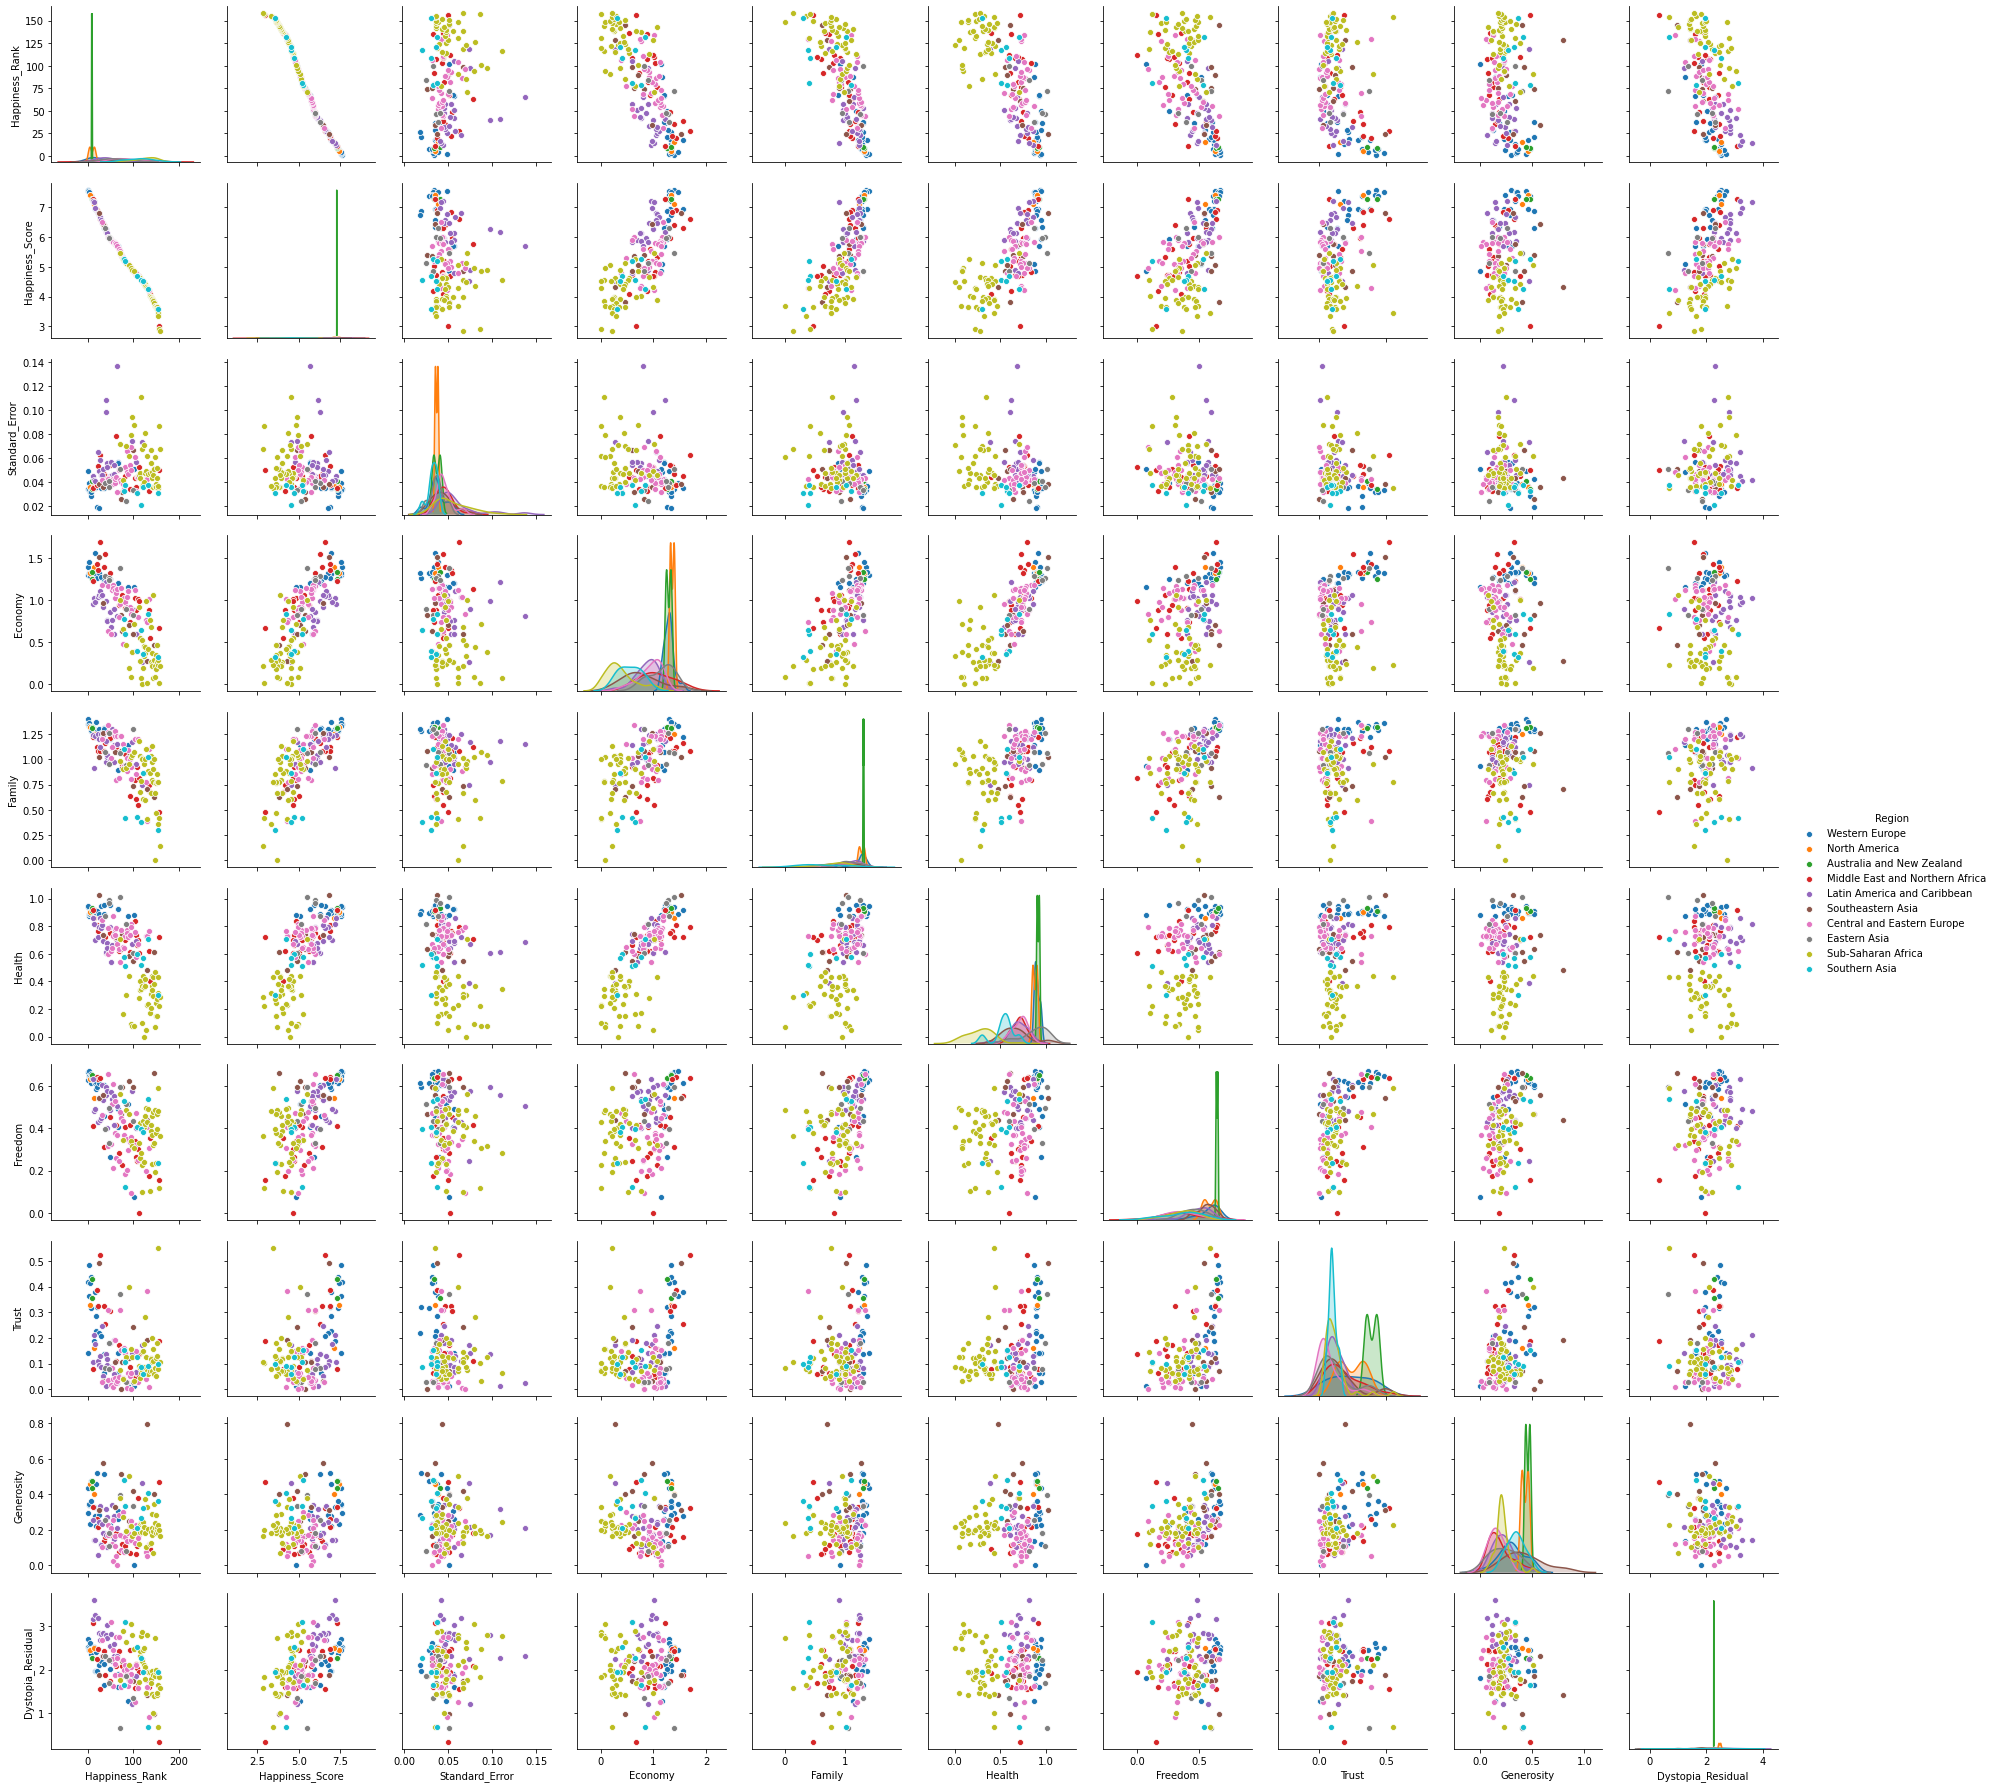

In [0]:
sns.pairplot(df_15, hue="Region")

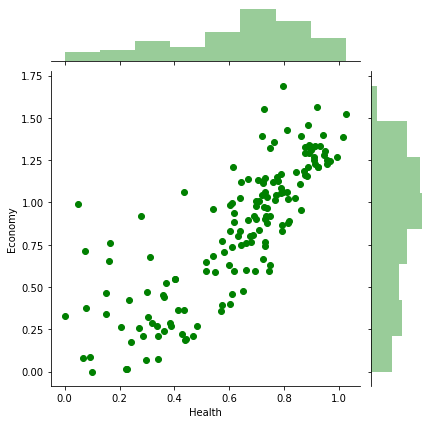

In [0]:
sns.jointplot(x="Health", y="Economy", data=df_15, color ='green')

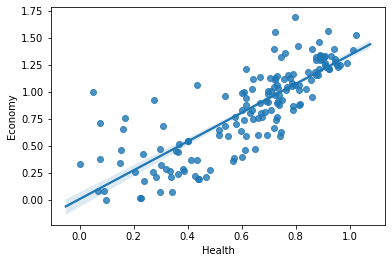

In [0]:
#regex plot
ax = sns.regplot(x=df_15['Health'], y=df_15['Economy'], ci=68, truncate=False)

Regex plot shows Health and Economy has a linear relationship

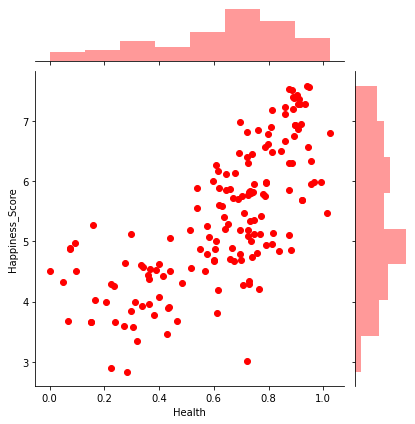

In [0]:
sns.jointplot(x="Health", y="Happiness_Score", data=df_15, color ='red')

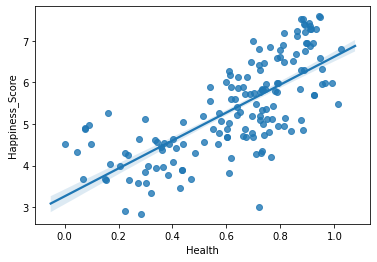

In [0]:
#regex plot
ax = sns.regplot(x=df_15['Health'], y=df_15['Happiness_Score'], ci=68, truncate=False)

Health and Happiness score also show linear regression relationship

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness_Score, dtype: float64


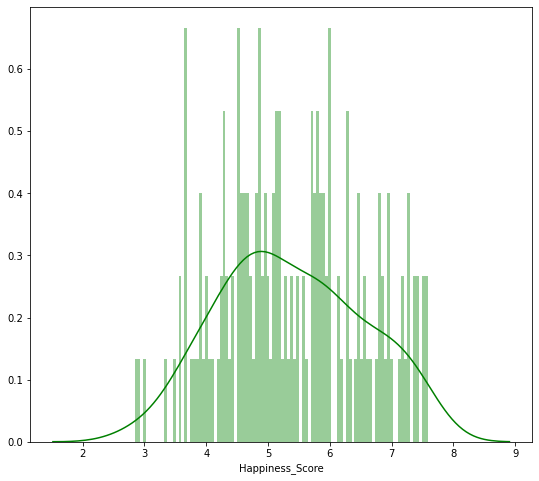

In [0]:
print(df_15['Happiness_Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_15['Happiness_Score'], color='g', bins=100, hist_kws={'alpha': 0.4});

Distplot shows that Happiness score is normally distributed for 2015 with a mean score of 5.36 and a standard deviation of 1.145

In [0]:
df_num = df_15.select_dtypes(include = ['float64', 'int64'])
df_num.head()


,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matpl

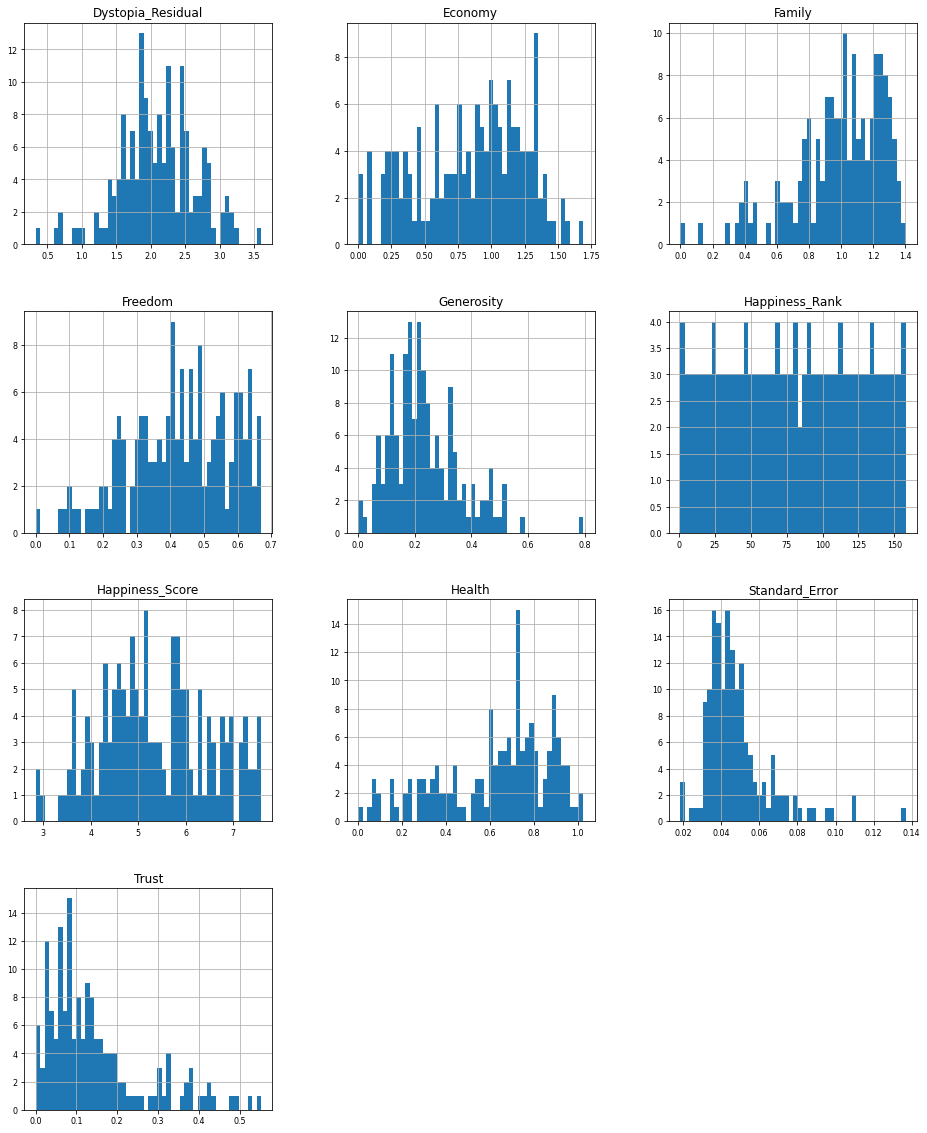

In [0]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

#### Correlation of different attributes with Happiness rank for 2015

In [0]:
df_num_corr = df_num.corr()['Happiness_Rank'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Happiness rank:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with Happiness rank:
Happiness_Rank     1.000000
Freedom           -0.556886
Family            -0.733644
Health            -0.735613
Economy           -0.785267
Happiness_Score   -0.992105
Name: Happiness_Rank, dtype: float64


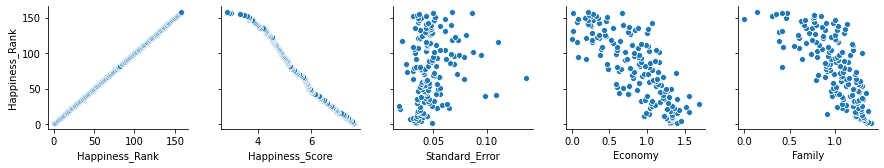

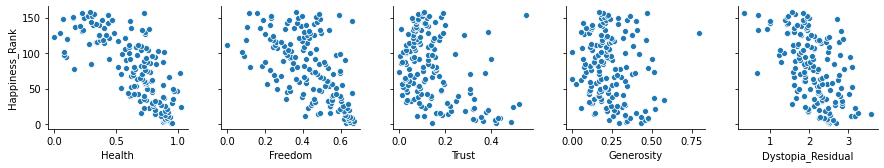

In [0]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Happiness_Rank'])

From the pairplots, we can conclude that Happiness rank for the year 2015 is strongly correlated with Happiness Score, Economy, Family, Health and Freedom. This correlation is also visible in the Heat Map below

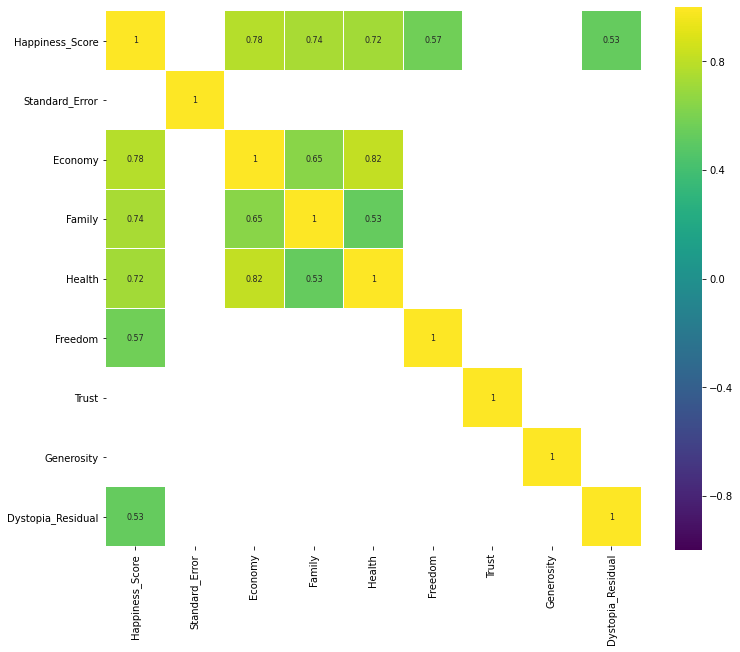

In [0]:
corr = df_num.drop('Happiness_Rank', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [0]:
quantitative_features_list = ['Happiness_Score','Standard_Error','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia_Residual']
df_quantitative_values = df_15[quantitative_features_list]
df_quantitative_values.head()


,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [0]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('Happiness_Rank')
features_to_analyse

['Happiness_Score', 'Economy', 'Family', 'Health', 'Freedom', 'Happiness_Rank']

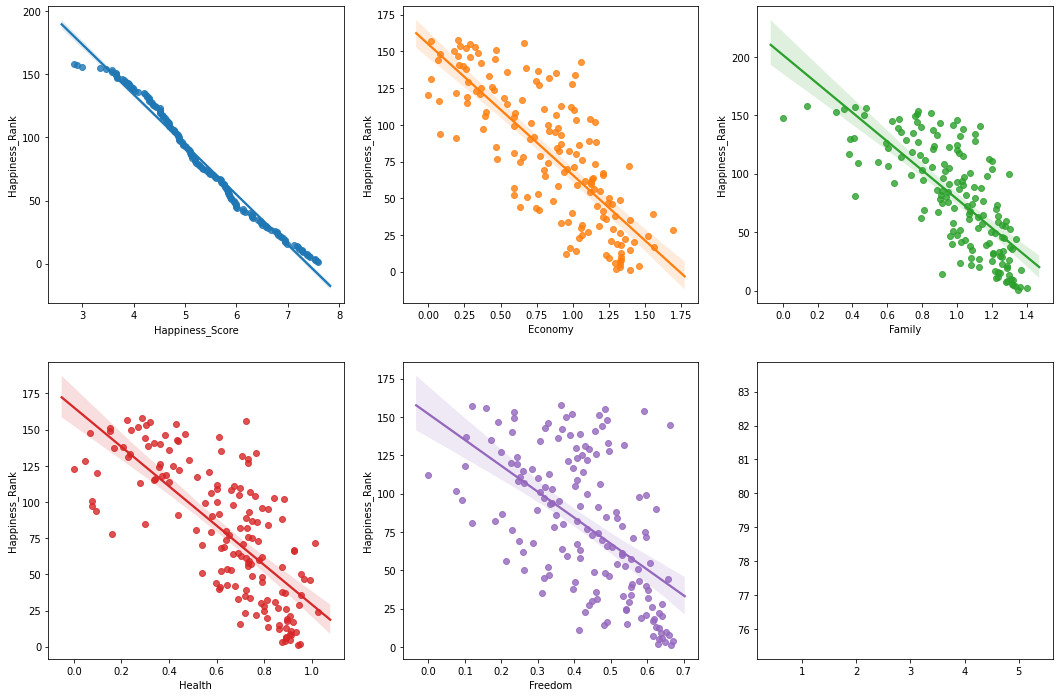

In [0]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Happiness_Rank', data=df_15[features_to_analyse], ax=ax)

From the regression plots above, we can conclude that Happiness Rank is linearly correlated with Happiness Score, Economy, Family, Health and Freedom with some noise. Happiness Rank improves with increase in Happiness Score, Economy, Family, Health and Freedom for year 2015

Box plots to show the Happiness rank region wise

In [0]:
not_num = ['Country','Region']
df_not_num = df_15[not_num]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

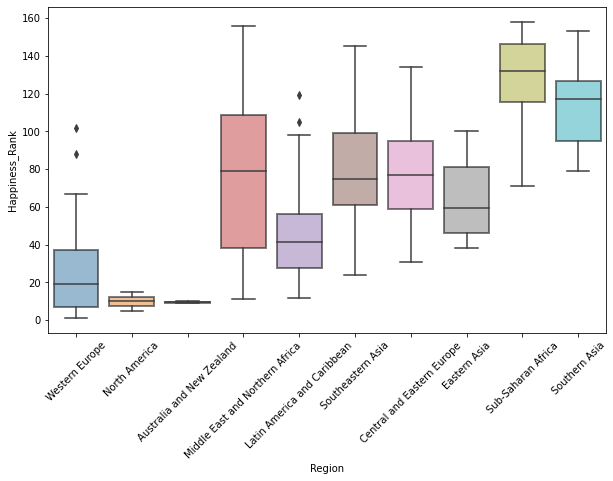

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Region', y='Happiness_Rank', data=df_15)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

From the boxplot, we can conclude the following -
1. Australia and New Zealand region has the highest variation in Happiness rank whereas North America has the least variation.
2. Happiness rank is highest in Sub-Saharan Africa and lowest in North America

## Happiness Data Analysis for the year 2016

#### Data Cleaning

In [0]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country              157 non-null object
Region               157 non-null object
Happiness_Rank       157 non-null int64
Happiness_Score      157 non-null float64
Lower                157 non-null float64
Upper                157 non-null float64
Economy              157 non-null float64
Family               157 non-null float64
Health               157 non-null float64
Freedom              157 non-null float64
Trust                157 non-null float64
Generosity           157 non-null float64
Dystopia_Residual    157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness_Score, dtype: float64


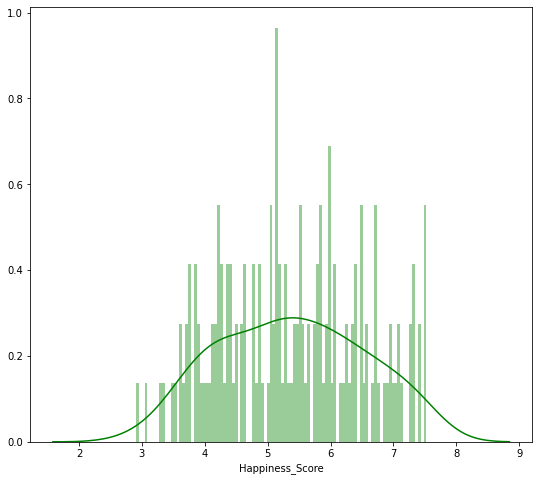

In [0]:
print(df_16['Happiness_Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_16['Happiness_Score'], color='g', bins=100, hist_kws={'alpha': 0.4});

Distplot shows that Happiness score is normally distributed for 2016 with a mean score of 5.38 and a standard deviation of 1.14

In [0]:
df_num = df_16.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Happiness_Rank,Happiness_Score,Lower,Upper,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matpl

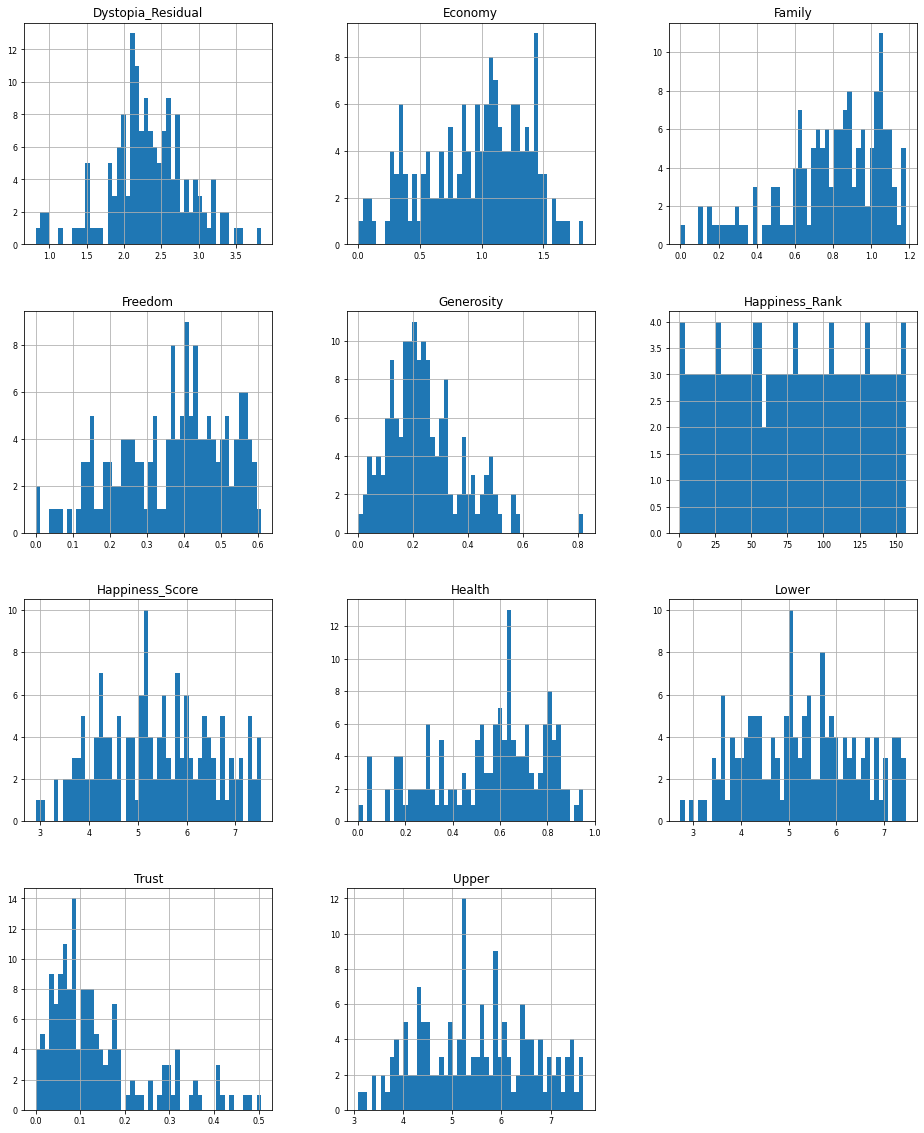

In [0]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

#### Correlation of different attributes with Happiness Rank for year 2016

In [0]:
df_num_corr = df_num.corr()['Happiness_Rank'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Happiness rank:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with Happiness rank:
Happiness_Rank     1.000000
Freedom           -0.557169
Family            -0.733276
Health            -0.767991
Economy           -0.793577
Lower             -0.994928
Upper             -0.995525
Happiness_Score   -0.995743
Name: Happiness_Rank, dtype: float64


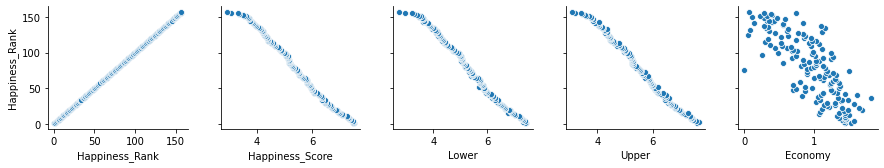

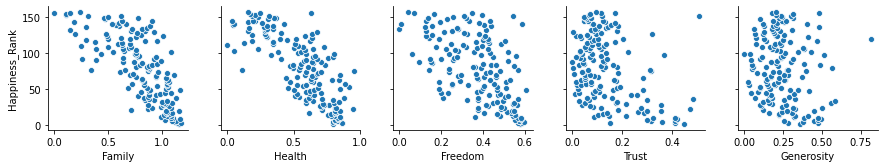

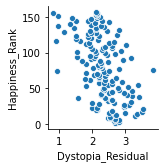

In [0]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Happiness_Rank'])

From the pairplots, we can conclude that Happiness rank for the year 2016 is strongly correlated with Happiness Score, Economy, Family, Lower, Upper, Health and Freedom. This correlation is also visible in the Heat Map below

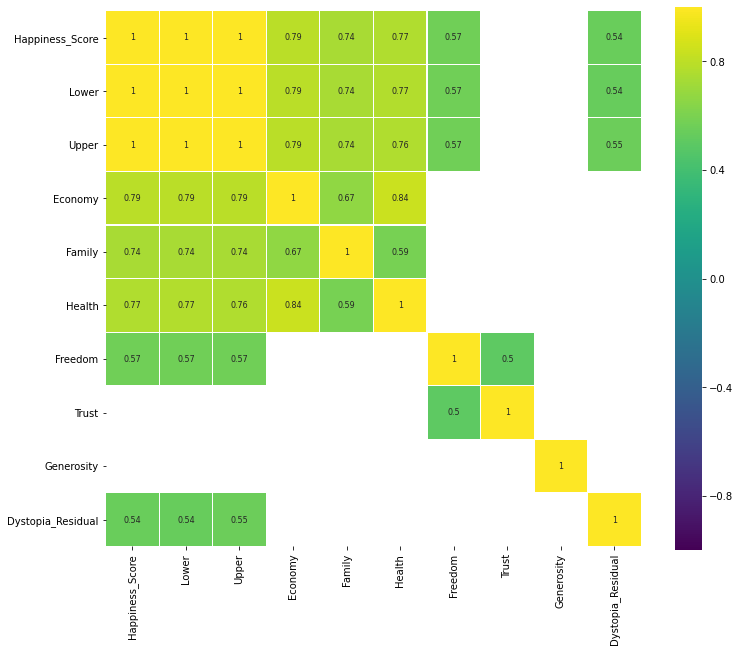

In [0]:
corr = df_num.drop('Happiness_Rank', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [0]:
quantitative_features_list = ['Happiness_Score','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia_Residual']
df_quantitative_values = df_16[quantitative_features_list]
df_quantitative_values.head()


,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


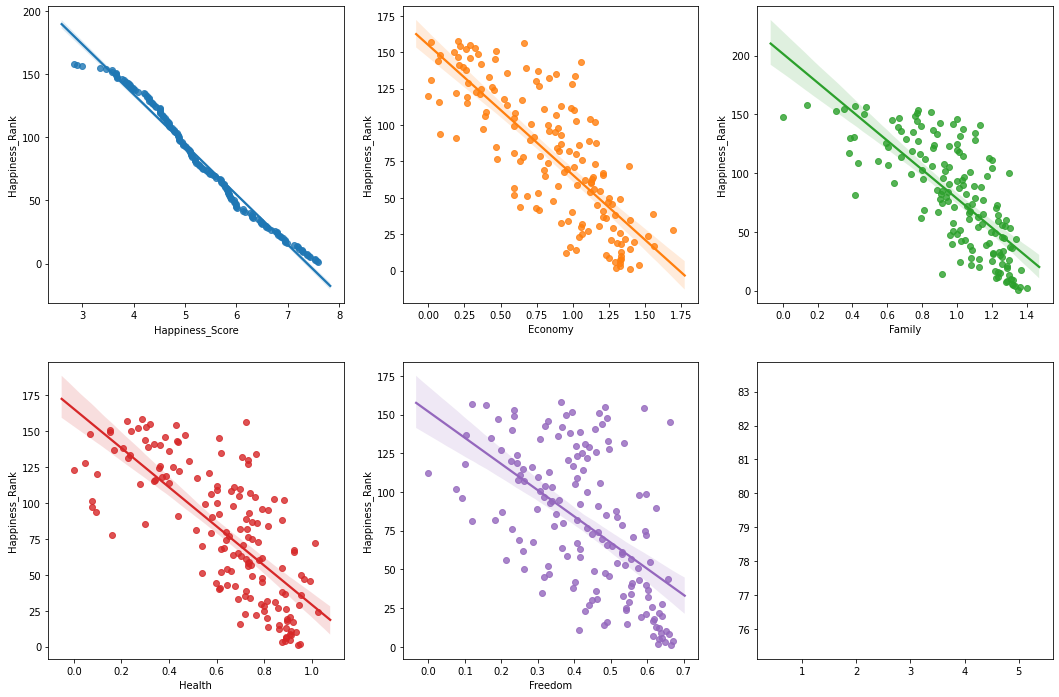

In [0]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Happiness_Rank', data=df_15[features_to_analyse], ax=ax)

From the regression plots above, we can conclude that Happiness Rank is linearly correlated with Happiness Score, Economy, Family, Health and Freedom with some noise. Happiness Rank improves with increase in Happiness Score, Economy, Family, Health and Freedom for year 2016

In [0]:
not_num = ['Country','Region']
df_not_num = df_16[not_num]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

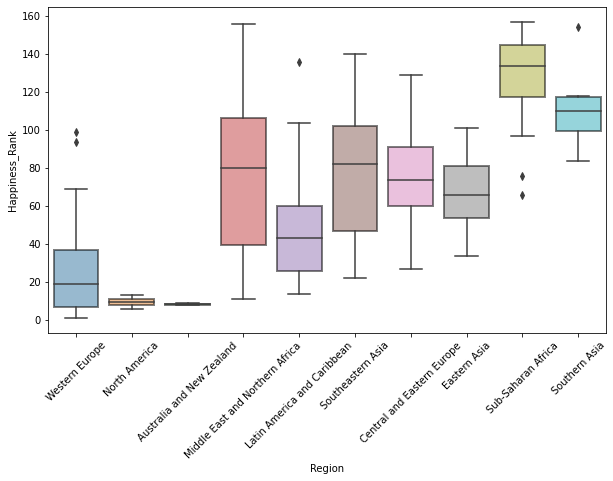

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Region', y='Happiness_Rank', data=df_16)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

From the boxplot, we can conclude the following -

1. Australia and New Zealand region has the highest variation in Happiness rank whereas North America has the least variation.
2. Happiness rank is highest in Sub-Saharan Africa and lowest in North America

## Happiness Analysis for year 2017

#### Data Cleaning

In [0]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
Country              155 non-null object
Region               150 non-null object
Happiness_Rank       155 non-null int64
Happiness_Score      155 non-null float64
Whisker_high         155 non-null float64
Whisker_low          155 non-null float64
Economy              155 non-null float64
Family               155 non-null float64
Health               155 non-null float64
Freedom              155 non-null float64
Generosity           155 non-null float64
Trust                155 non-null float64
Dystopia_Residual    155 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 15.9+ KB


count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness_Score, dtype: float64


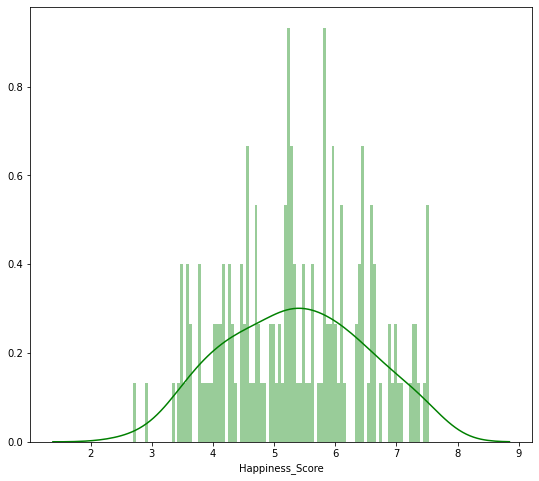

In [0]:
print(df_16['Happiness_Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_17['Happiness_Score'], color='g', bins=100, hist_kws={'alpha': 0.4});

Distplot shows that Happiness score is normally distributed for 2017 with a mean score of 5.38 and a standard deviation of 1.14

In [0]:
df_num = df_17.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia_Residual
0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\sharm\Anaconda3\lib\site-packages\pandas\plotting\_matpl

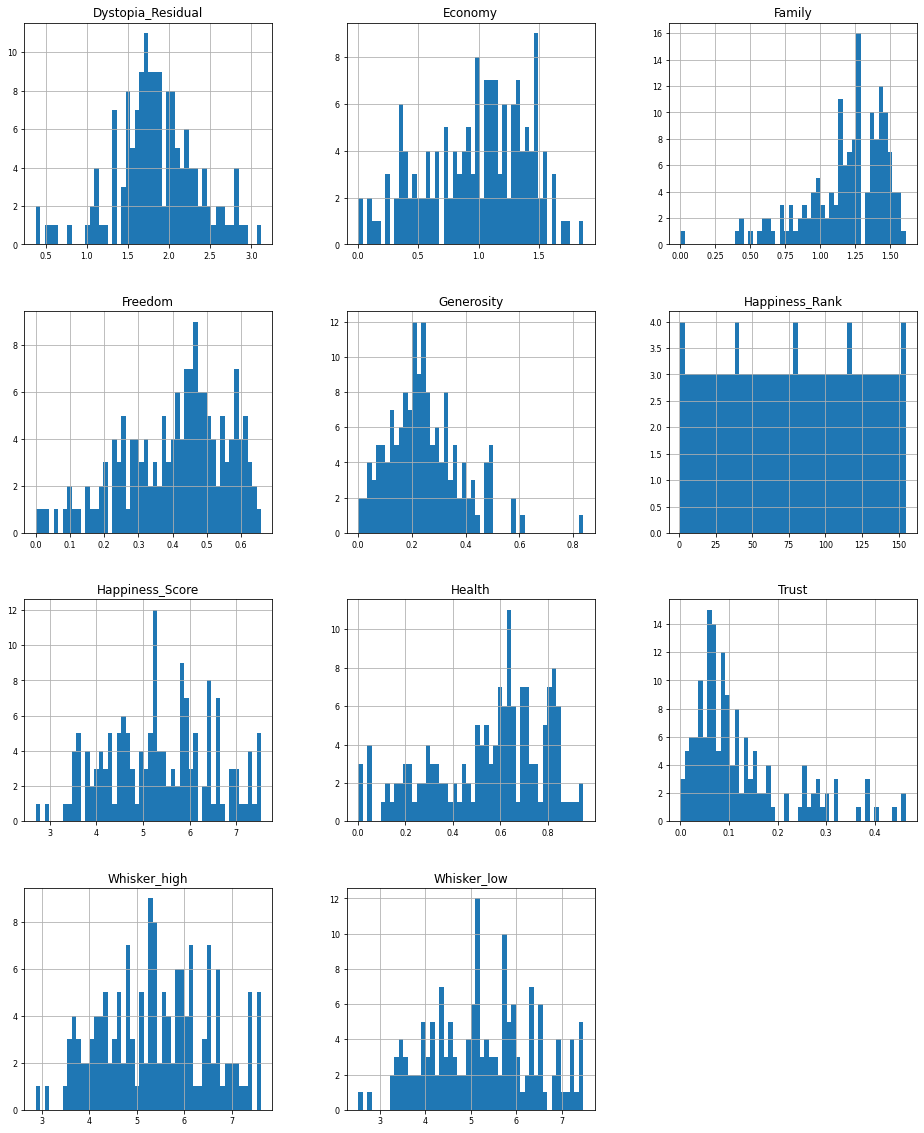

In [0]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

#### Correlation of different attributes with Happiness Rank for year 2017

In [0]:
df_num_corr = df_num.corr()['Happiness_Rank'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Happiness rank:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with Happiness rank:
Happiness_Rank     1.000000
Freedom           -0.551608
Family            -0.736753
Health            -0.780716
Economy           -0.813244
Whisker_low       -0.991533
Happiness_Score   -0.992774
Whisker_high      -0.993058
Name: Happiness_Rank, dtype: float64


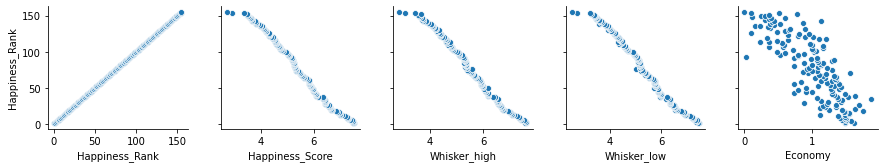

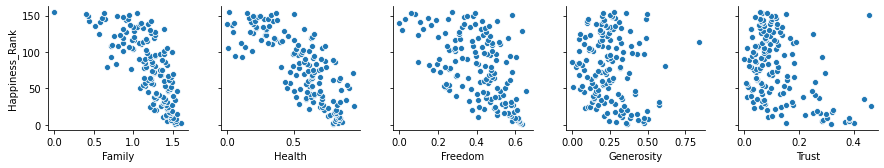

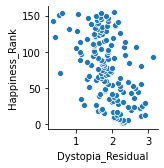

In [0]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Happiness_Rank'])

From the pairplots, we can conclude that Happiness rank for the year 2017 is strongly correlated with Happiness Score, Whisker_low, Whisker_high, Economy, Family, Health and Freedom. This correlation is also visible in the Heat Map below

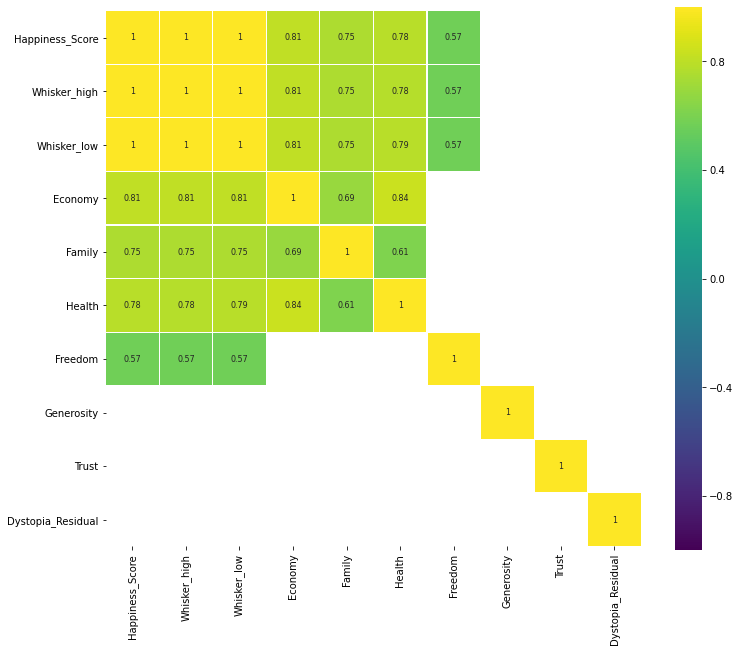

In [0]:
corr = df_num.drop('Happiness_Rank', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [0]:
quantitative_features_list = ['Happiness_Score','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia_Residual']
df_quantitative_values = df_17[quantitative_features_list]
df_quantitative_values.head()


,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182


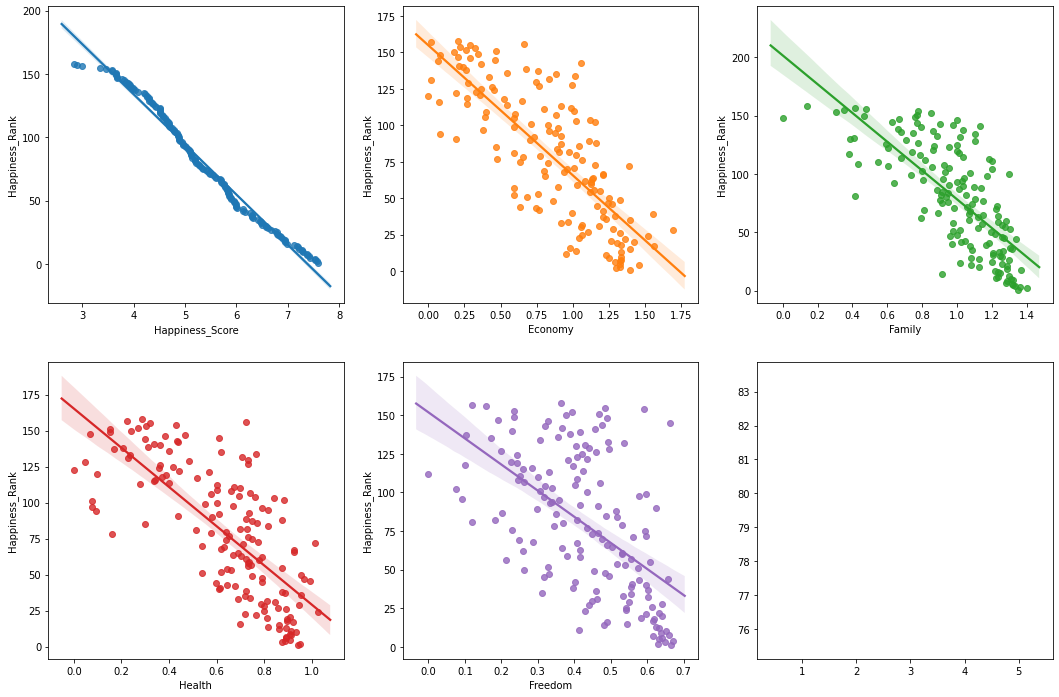

In [0]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Happiness_Rank', data=df_15[features_to_analyse], ax=ax)

From the regression plots above, we can conclude that Happiness Rank is linearly correlated with Happiness Score, Economy, Family, Health and Freedom with some noise. Happiness Rank improves with increase in Happiness Score, Economy, Family, Health and Freedom for year 2017

In [0]:
not_num = ['Country','Region']
df_not_num = df_17[not_num]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

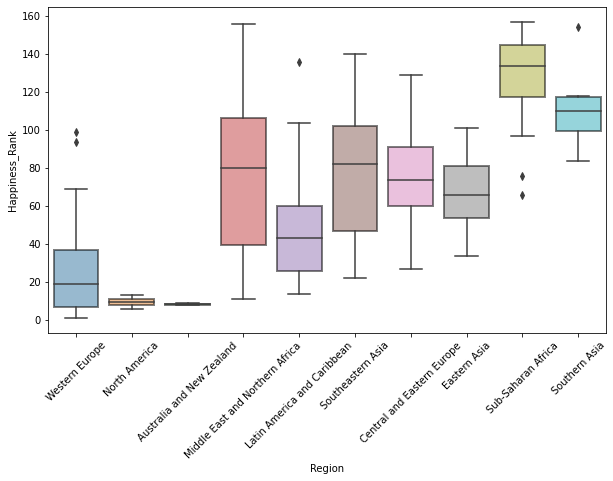

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Region', y='Happiness_Rank', data=df_16)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

From the boxplot, we can conclude the following -

1. Australia and New Zealand region has the highest variation in Happiness rank whereas North America has the least variation.
2. Happiness rank is highest in Sub-Saharan Africa and lowest in North America